In [ ]:
#Import Library

#Core libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#Models libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
#Load data
cars = pd.read_csv("./data/CarPrice_Assignment.csv")
cars.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
#Data information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
#Configs
font = {'size': 24}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelpad=20)
matplotlib.rc('axes', titlepad=20)
fig_size = (15, 15)

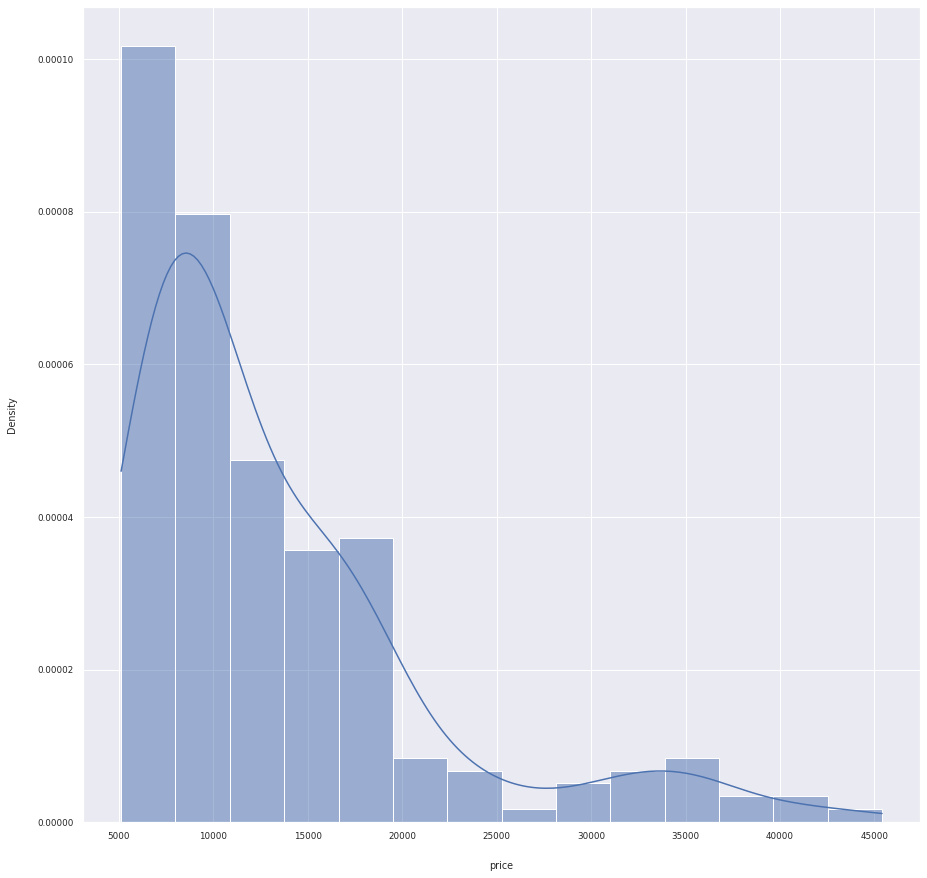

In [10]:
#Price Density
plt.figure(figsize=fig_size)
sns.histplot(cars, x="price", stat="density", kde=True)

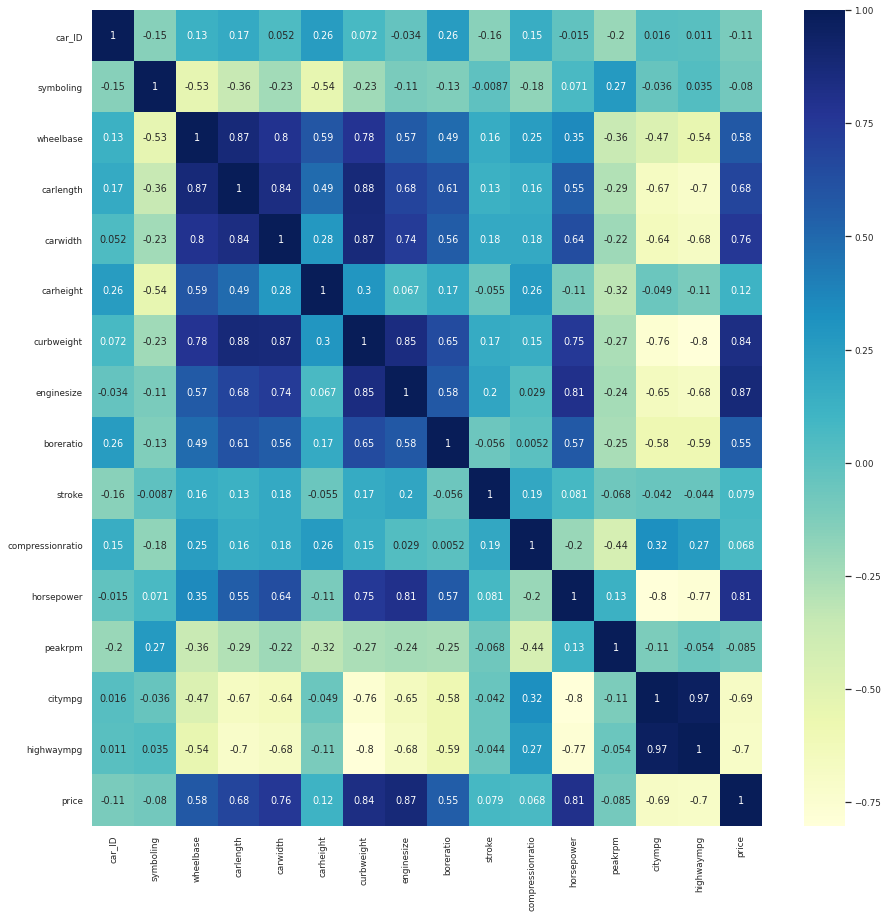

In [7]:
#Correlation Heatmap of numerical Variables
plt.figure(fig_size = (15, 15))
sns.set(font_scale=0.8)
sns.heatmap(cars.corr(), annot=True, cmap="YlGnBu")

In [ ]:
#Extract categorical data
cars_lr = cars
price = cars['price'] 
cars_lr.drop(['price'], axis=1, inplace=True)
cars_lr.head()

In [12]:
# Define function to get dummies variables
cars_lr = pd.get_dummies(cars_lr, columns=['fueltype', 'aspiration', 'doornumber', 
                                           'carbody', 'drivewheel', 'enginelocation',
                                           'enginetype', 'cylindernumber', 'fuelsystem'], drop_first=True)

In [13]:
cars_lr.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
#Add "Price" back into dataset
cars_lr=pd.concat([cars_lr, price], axis=1)
cars_lr.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,13495.0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,16500.0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,16500.0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,13950.0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,17450.0


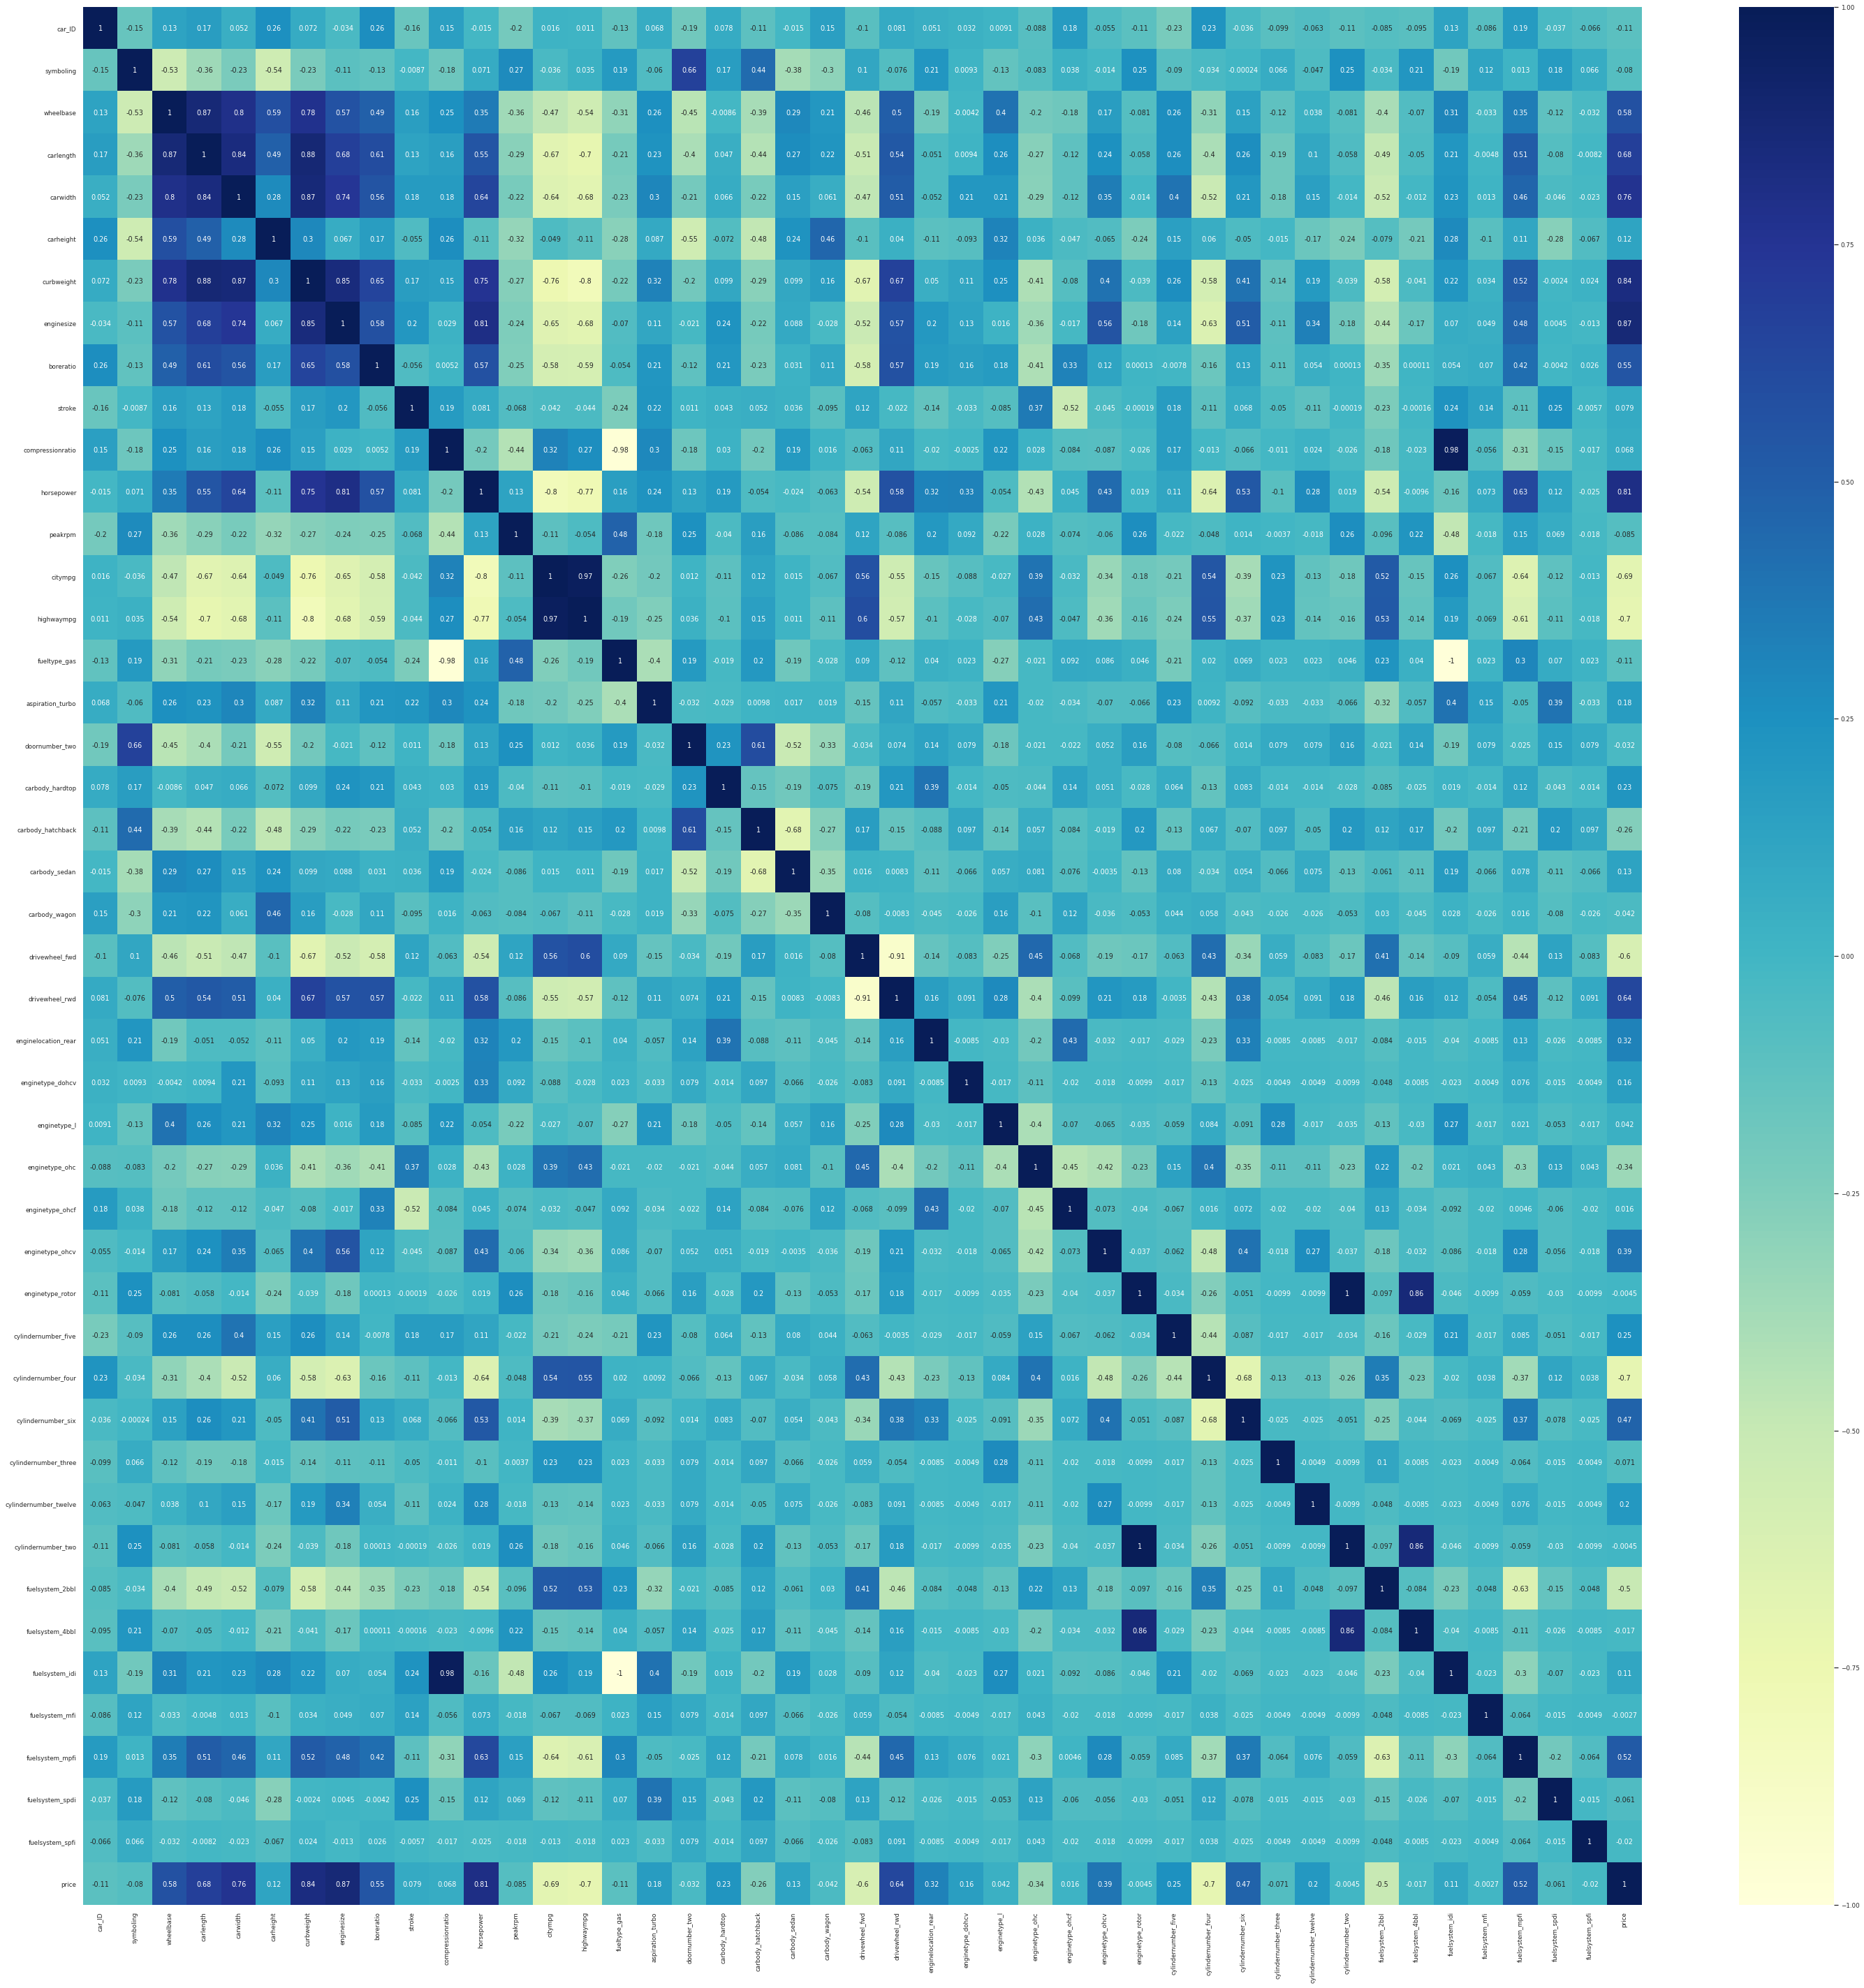

In [45]:
#Correlation Heatmap of all variables
plt.figure(figsize=(50, 50))
sns.set(font_scale=0.8)
sns.heatmap(cars_lr.corr(), annot=True, cmap="YlGnBu")

In [17]:
print(cars_lr.columns)

Index(['car_ID', 'symboling', 'CarName', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'price'],
      dtype='object')


In [18]:
#Extract highly related columns
related_columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 
                   'horsepower', 'drivewheel_rwd', 'fuelsystem_mpfi', 'citympg', 'highwaympg', 'cylindernumber_four', 'price']

In [20]:
#Extract numerical columns
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
            'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']

In [ ]:
#Scale numerical columns
scaler = MinMaxScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

In [22]:
df[num_vars].head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.262500,0.222222,0.289474,0.207959
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.262500,0.222222,0.289474,0.282558
2,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.441667,0.166667,0.263158,0.282558
3,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.225000,0.305556,0.368421,0.219254
4,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.279167,0.138889,0.157895,0.306142


In [23]:
#Split train and test set
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)
print(df_train.shape)
print(df_test.shape)

(143, 13)
(62, 13)


In [24]:
#Split X and Y
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

In [25]:
#Create model
# Recursive Feature Selection using scikit-learn Linear Regression

# Choose best 8 variables using RFE
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

In [26]:
print(list(zip(X_train.columns,  rfe.support_, rfe.ranking_)))

[('wheelbase', False, 4), ('carlength', False, 2), ('carwidth', True, 1), ('curbweight', True, 1), ('enginesize', True, 1), ('boreratio', False, 3), ('horsepower', True, 1), ('drivewheel_rwd', True, 1), ('fuelsystem_mpfi', False, 5), ('citympg', True, 1), ('highwaympg', True, 1), ('cylindernumber_four', True, 1)]


In [27]:
print(X_train.columns[rfe.support_])

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'drivewheel_rwd',
       'citympg', 'highwaympg', 'cylindernumber_four'],
      dtype='object')


In [28]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,enginesize,horsepower,drivewheel_rwd,citympg,highwaympg,cylindernumber_four
40,0.183333,0.342901,0.184906,0.158333,0,0.388889,0.447368,1
60,0.516667,0.357642,0.230189,0.150000,0,0.361111,0.421053,1
56,0.450000,0.346005,0.033962,0.220833,1,0.111111,0.184211,0
101,0.516667,0.623351,0.452830,0.433333,0,0.111111,0.157895,0
86,0.425000,0.355702,0.230189,0.166667,0,0.333333,0.421053,1


In [29]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 40 to 172
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carwidth             143 non-null    float64
 1   curbweight           143 non-null    float64
 2   enginesize           143 non-null    float64
 3   horsepower           143 non-null    float64
 4   drivewheel_rwd       143 non-null    uint8  
 5   citympg              143 non-null    float64
 6   highwaympg           143 non-null    float64
 7   cylindernumber_four  143 non-null    uint8  
dtypes: float64(6), uint8(2)
memory usage: 8.1 KB


In [30]:
#OLS Linear Regression
X_train_rfe = sm.add_constant(X_train_rfe)
linear_model = sm.OLS(y_train, X_train_rfe).fit()


In [31]:
linear_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     104.2
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           1.07e-53
Time:                        10:29:20   Log-Likelihood:                 171.38
No. Observations:                 143   AIC:                            -324.8
Df Residuals:                     134   BIC:                            -298.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0813      0.060     -1.358      0.177      -0.200       0.037
carwidth                0.1918      0.076      2.526      0.013       0.042       0.342
curbweight              0.0397      0.098      0.404      0.687      -0.154       0.234
enginesize              0.4487      0.104      4.302      0.000       0.242       0.655
horsepower              0.2607      0.108      2.418      0.017       0.047       0.474
drivewheel_rwd          0.0819      0.018      4.486      0.000       0.046       0.118
citympg                -0.1444      0.174     -0.830      0.408      -0.488       0.200
highwaympg              0.2504      0.168      1.491      0.138      -0.082       0.583
cylindernumber_four    -0.0952      0.022     -4.346      0.000      -0.139      -0.052
==============================================================================
Omnibus:                        8.219   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               15.572
Skew:                          -0.117   Prob(JB):                     0.000415
Kurtosis:                       4.600   Cond. No.                         61.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Get predicted results
y_train_price = linear_model.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

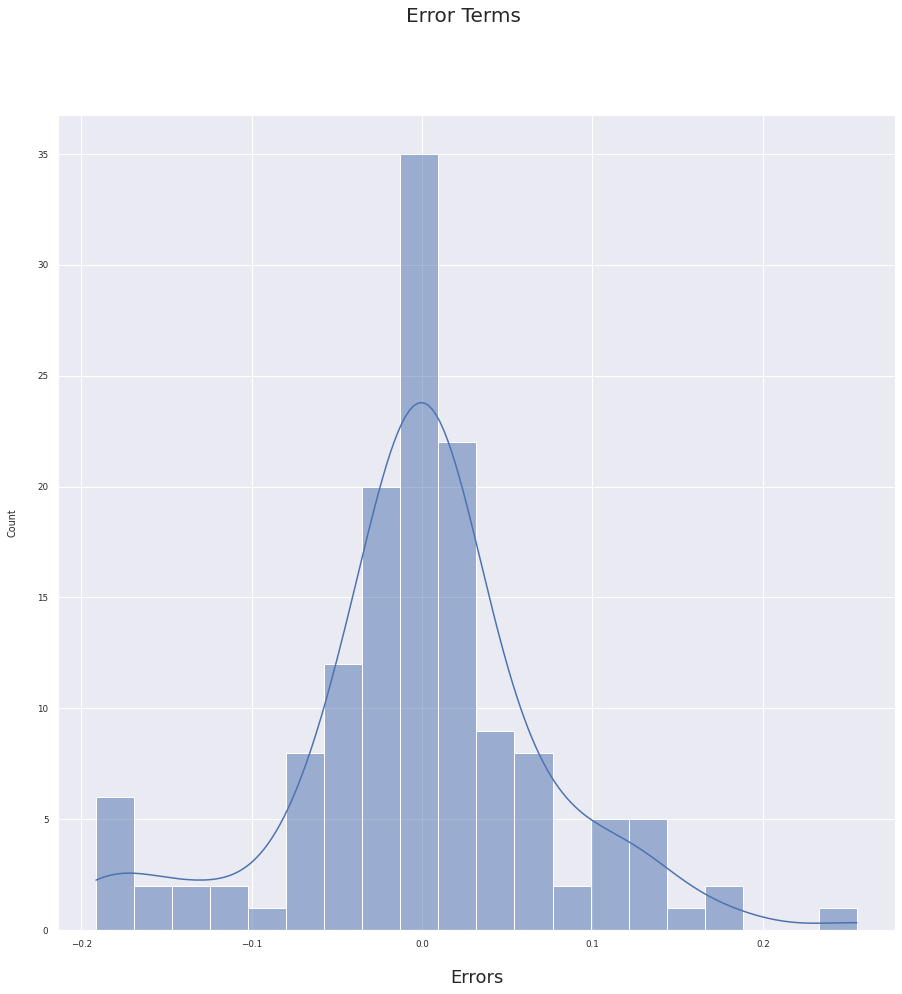

In [34]:
#Analyze residual 
fig = plt.figure(figsize=fig_size)
sns.histplot(x=(y_train - y_train_price), kde=True, bins=20)
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)

In [35]:
# Extract relevant column from test set
X_train_new = X_train_rfe.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns]
print(X_test_new)

     carwidth  curbweight  ...  highwaympg  cylindernumber_four
52   0.325000    0.161753  ...    0.578947                    1
181  0.516667    0.645074  ...    0.210526                    0
5    0.500000    0.395268  ...    0.236842                    0
18   0.000000    0.000000  ...    0.973684                    0
188  0.433333    0.314973  ...    0.421053                    1
..        ...         ...  ...         ...                  ...
198  0.575000    0.603957  ...    0.157895                    1
143  0.425000    0.330489  ...    0.421053                    1
24   0.291667    0.185803  ...    0.578947                    1
30   0.300000    0.087277  ...    1.000000                    1
135  0.516667    0.492630  ...    0.315789                    1

[62 rows x 8 columns]


In [36]:
#Add constant to test set
X_test_new = sm.add_constant(X_test_new)

#Predict using training model
y_pred = linear_model.predict(X_test_new)

In [37]:
#Evaluate using R2 score
print(r2_score(y_test, y_pred))

0.8006737842332712


Text(0, 0.5, 'y_pred')

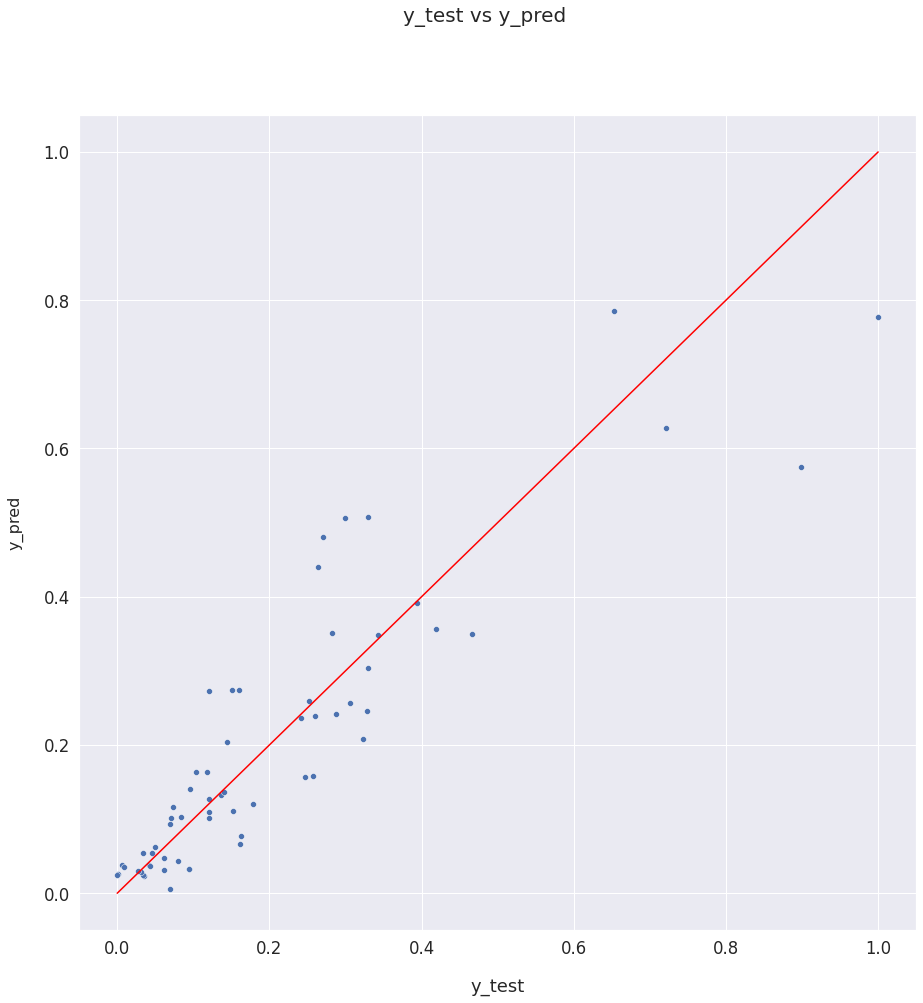

In [39]:
#Visualize predicted value
fig = plt.figure(figsize=fig_size)
sns.scatterplot(x=y_test, y=y_pred)
sns.set(font_scale=1.5)
sns.lineplot(x=y_test, y=y_test, color='red')
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [40]:
#Get Variance Inflated Factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

              Features    VIF
0                const  90.14
6              citympg  21.01
7           highwaympg  19.90
2           curbweight  10.10
4           horsepower   7.31
3           enginesize   6.89
1             carwidth   4.26
8  cylindernumber_four   2.05
5       drivewheel_rwd   2.00


In [41]:
reverse_test = X_test.assign(price=y_test.values)
reverse_pred = X_test.assign(price=y_pred.values)
reverse_pred.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'drivewheel_rwd', 'fuelsystem_mpfi',
       'citympg', 'highwaympg', 'cylindernumber_four', 'price'],
      dtype='object')

In [42]:
reverse_test[num_vars] = scaler.inverse_transform(reverse_test[num_vars])
reverse_pred[num_vars] = scaler.inverse_transform(reverse_pred[num_vars])

In [43]:
y_test_reverse = reverse_test["price"]
y_pred_reverse = reverse_pred["price"]

In [44]:
print("Predicted:\n", y_pred_reverse.head())
print("Actual:   \n", y_test_reverse.head())

Predicted:
 52      6629.066928
181    22862.342798
5      15584.215046
18      6169.343963
188     9553.962891
Name: price, dtype: float64
Actual:   
 52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
Name: price, dtype: float64
